In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
df = pd.read_csv(r"G:\1-uni\machine learning\machine_learning_with_python_jadi-main\FuelConsumption.csv")


In [3]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

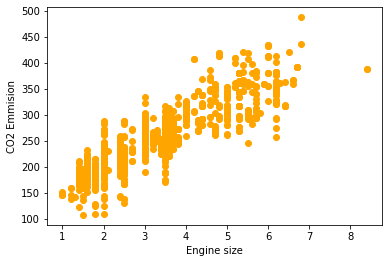

In [4]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'orange')
plt.xlabel('Engine size'), plt.ylabel('CO2 Emmision')
plt.show()

In [5]:
msk = np.random.rand(len(df)) < 0.8
train, test = cdf[msk], cdf[~msk]

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray((train[['ENGINESIZE']]))
train_y = np.asanyarray((train[['CO2EMISSIONS']]))

test_x = np.asanyarray((train[['ENGINESIZE']]))
test_y = np.asanyarray((train[['CO2EMISSIONS']]))

poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.   ,  2.   ,  4.   ,  8.   ],
       [ 1.   ,  2.4  ,  5.76 , 13.824],
       [ 1.   ,  1.5  ,  2.25 ,  3.375],
       ...,
       [ 1.   ,  3.   ,  9.   , 27.   ],
       [ 1.   ,  3.2  , 10.24 , 32.768],
       [ 1.   ,  3.2  , 10.24 , 32.768]])

In [7]:
clf = linear_model.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)

print('coefficients:', clf.coef_)
print('intercept:', clf.intercept_)

coefficients: [[ 0.         26.94603916  4.71621586 -0.51139601]]
intercept: [133.3182039]


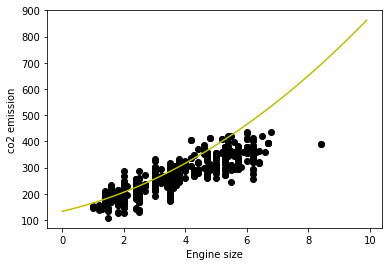

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'black')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*XX + clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-y')
plt.xlabel('Engine size'), plt.ylabel('co2 emission')
plt.show()